In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [1]:
#2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/cc_datasets/customer_lifetime_value_data.csv")

# Define CLV classes
def categorize_clv(value):
    if value < 5000:
        return "Low"
    elif 5000 <= value < 15000:
        return "Medium"
    else:
        return "High"

# Create the 'CLV_Class' column based on the defined thresholds
df["CLV_Class"] = df["LifetimeValue"].apply(categorize_clv)

# Features and target variable
X = df.drop(columns=["CustomerID", "LifetimeValue", "CLV_Class"])
y = df["CLV_Class"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.92      0.94        96
         Low       0.75      0.83      0.79        48
      Medium       0.71      0.70      0.70        56

    accuracy                           0.83       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.84      0.83      0.84       200



In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/cc_datasets/customer_lifetime_value_data.csv")

# Display the first few rows
print(data.head())


   CustomerID  Tenure  AvgTransactionValue  TotalTransactions  Recency  \
0           1      39                42.51                 84      325   
1           2      52               148.96                118      176   
2           3      29                30.65                  7      116   
3           4      15               259.12                 54      204   
4           5      43               248.58                129      321   

   Frequency  ChurnProbability  LifetimeValue  
0       2.47              0.40        5291.98  
1       4.98              0.81       16631.62  
2       1.53              0.59         134.59  
3       2.96              0.17       34376.72  
4       3.52              0.02      110617.70  


<ipython-input-3-200ac30c7a7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="CLV_Class", palette="viridis")


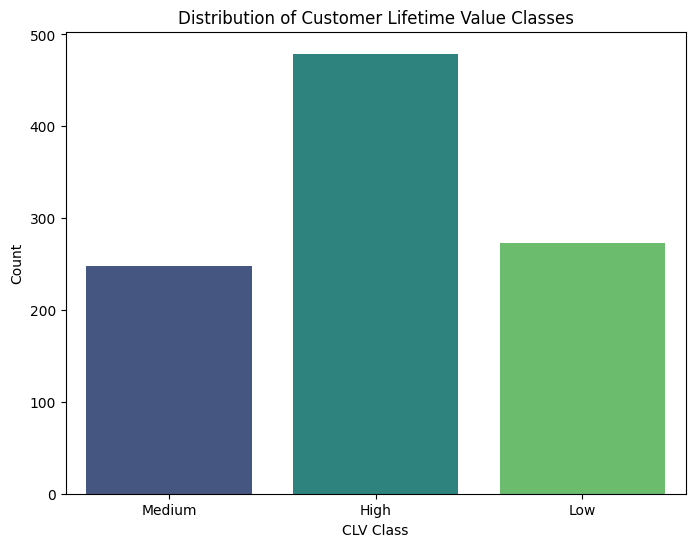

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CLV classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="CLV_Class", palette="viridis")
plt.title("Distribution of Customer Lifetime Value Classes")
plt.xlabel("CLV Class")
plt.ylabel("Count")
plt.show()


<ipython-input-4-9af33587861d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


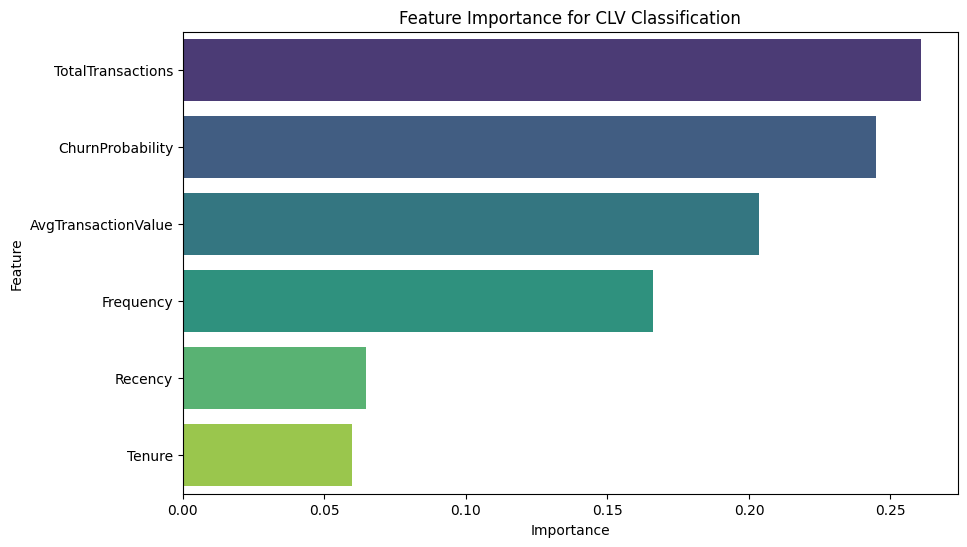

In [4]:
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance for CLV Classification")
plt.show()


<Figure size 800x600 with 0 Axes>

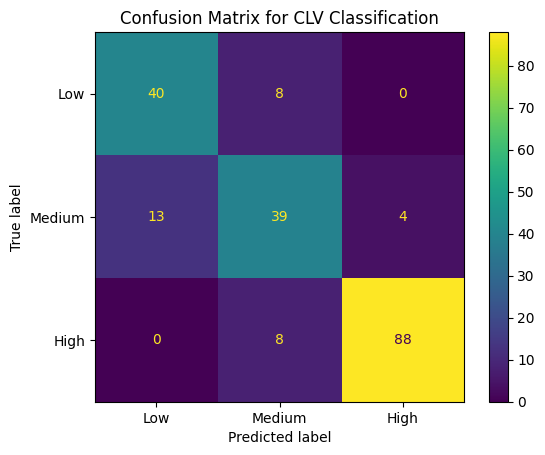

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis")
plt.title("Confusion Matrix for CLV Classification")
plt.show()
